In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch

device = "mps" if torch.backends.mps.is_available() and torch.backends.mps.is_built() else "cpu"

tensor = torch.rand((1,1), device=device)

print(device)
print(tensor)

cpu
tensor([[0.5051]])


In [3]:
import torch
import numpy as np

ndarray = np.array([1,2,3], dtype=np.uint8)
print(torch.tensor(ndarray))
print(torch.Tensor(ndarray))
print(torch.from_numpy(ndarray))

tensor([1, 2, 3], dtype=torch.uint8)
tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.uint8)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

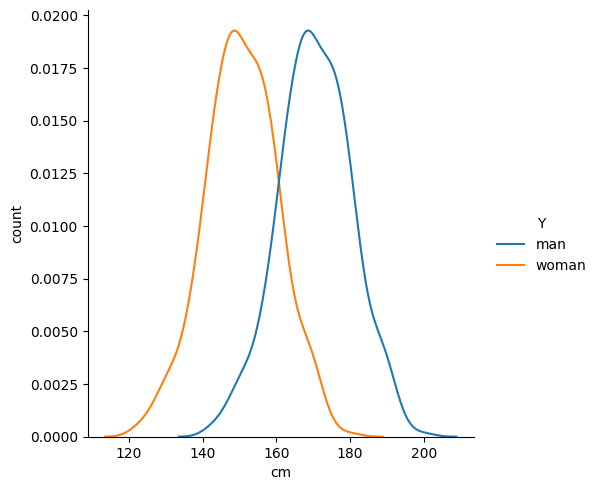

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

# 성별에 따른 키 차이 검정
man_height = stats.norm.rvs(loc=170, scale=10, size=500, random_state=1)
woman_height = stats.norm.rvs(loc=150, scale=10, size=500, random_state=1)

X = np.concatenate([man_height, woman_height])
Y = ["man"] * len(man_height) + ["woman"] * len(woman_height)

df = pd.DataFrame(list(zip(X, Y)), columns=["X", "Y"])
fig = sns.displot(data=df, x="X", hue="Y", kind="kde")
fig.set_axis_labels("cm", "count")
plt.show()

In [5]:
# 비쌍체 t-검정
statistic, pvalue =  stats.ttest_ind(man_height, woman_height, equal_var=True)

print("statistic:", statistic)
print("pvalue:", pvalue)
print("*:", pvalue < 0.05)
print("**:", pvalue < 0.001)

statistic: 31.96162891312776
pvalue: 6.2285854381989205e-155
*: True
**: True


In [6]:
#  연속형 변수에 사용되는 손실함수(Loss Function)

# 제곱 오차 (SE)
# 오차 제곱합 (SSE)
# 평균 제곱 오차 (MSE)
# 평균 제곱근 오차 (RMSE)

In [7]:
# 이산형 변수에 사용되는 손실함수

# 교차 엔트로피 (Cross-Entropy) : 실젯값의 확률분포와 예측값의 확률분포 차이를 계산한다. 

In [8]:
# 최적화 (Optimization)
# 실젯값과 예측값의 차이(=손실함수)를 계산해 오차를 최소로 줄일 수 있는 가중치와 편향을 계산한다.

# 최적의 가중치와 편향을 갖는 가설은 -> 오차값이 0에 가까운 함수
#                            -> 이는 가중치와 오차에 대한 도함수의 변화량이 0에 가깝다는 의미
#                            -> 다시 말해 가중치와 오차에 대한 그래프의 극값이,
#                            -> 가설을 가장 잘 표현하는 가중치와 오차가 된다.

In [9]:
# 경사하강법 (Gradient Descent) : 함수의 기울기가 낮은 곳으로 계속 이동시켜 극값에 도달할 때까지 반복하는 알고리즘

# 초깃값(W0)을 설정하여 다음 가중치(W1,W2,W3,...)를 찾는다.
# 새로운 가중치는 기울기의 부호(+,-)와 관계없이 기울기가 0인 방향으로 학습이 진행된다.(기울기가 0을 갖게되는 가중치를 찾을때 까지 반복)
# 어느 지점에서 시작하더라도 극값을 찾을수 있도록 연산 진행 
# 이 과정에서 a를 곱해 가중치 결과를 조정하게 되는데,
# 기울기가 한번에 이동하는 간격(Step Size)을 조정한다. 
# Wi에서 Wi+1로 가중치를 갱신한다. <= 경사하강법을 적용하여 과정을 반복, 최적의 가중치를 찾을 수 있다.
# 가중치를 갱신할 떄 a를 곱해 가중치결과를 조정하게 되는데, a=학습률(Learning_Rate)라고 한다. 
# 학습률(a)도 임의의 값으로 초깃값을 설정한다.
# 학습률에 따라 다음 가중치의 변화량이 결정되며, 이에 따라 최적의 해를 찾기위한 반복 횟수가 결정된다.

In [10]:
# 최적화 문제 : 
# 초깃값 또는 학습률을 너무 낮거나 높게 잡으면,
# 최적의 가중치를 찾는데 오랜 시간이 걸리거나, 그래프가 발산하여 아예 값을 찾지 못할 수 있다.

# 기울기가 0이 되는 지점 - 최댓값, 최솟값, 극댓값, 극솟값으로 구분할 수 있다.
# 초기 가중치나 학습률을 설정할때 시작점이 적절하지 않거나 학습률이 너무 낮으면 최솟값이 아닌 극솟값에서 가중치가 결정될수 있다.

# 특히 안장점(saddle point)그래프 처럼, 특정방향에서 바라볼경우 최댓값(또는 극댓값)이 되지만, 다른 방향에서 보면 최솟값(또는 극솟값)이 될 수 있다.

# 최적화 알고리즘은 경사하강법 이외에도 Momentum, Adagrad, Adam 등이 있다.

In [11]:
# 에폭(Epoch) : 인공신경망에서 순전파와 역전파 과정 등의 모델연산을 전체 데이터 세트가 1회 통과하는것을 의미

# 순전파(Forward Propagation) : 입력 데이터를 기반으로 신경망을 따라 입력층부터 출력층까지 차례대로 변수를 계산하고 추론한 결과를 의미함.

# 역전파(Backward Propagation) : 예측값과 실젯값의 오차가 최소화 되도록 모델 가중치를 수정하는 것을 의미함.

# 따라서, 한번의 에폭은 전체 데이터세트에 대해 순전파/역전파 과정을 수행하여 한번의 학습이 진행된것을 의미한다.
# 에폭값이 너무 적을 경우, 학습이 제대로 되지 않는 과소적합(Underfitting)이 발생하며,
# 에폭이 너무 많을 경우 과대적합(Overfitting)이 발생할 수 있다.

In [12]:
# 단순 선형 회귀 (numpy ver.)

import numpy as np

x = np.array(
    [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
)

y = np.array(
    [[0.94],[1.98],[2.88],[3.92],[3.96],[4.55],[5.64],[6.3],[7.44],[9.1]]
)

# 하이퍼 파라미터 초기화
weight = 0.0
bias = 0.0
learning_rate = 0.005

# 에폭 설정
for epoch in range(1000):
    
    # 가설과 손실 함수 선언
    y_hat = weight * x + bias
    cost = ((y - y_hat) ** 2).mean()

    # 가중치와 편향 갱신
    weight = weight - learning_rate * ((y_hat - y) * x).mean()
    bias = bias - learning_rate * (y_hat - y).mean()

    # 학습 기록 출력
    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}. Bias : {bias:.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.819. Bias : 0.163, Cost : 0.150


In [13]:
# 초깃값에 따른 학습 결과 변화 관찰 : 이번에는 가중치와 편향은 유지하고, learning_rate를 변경한 결과를 확인해본다.

# learning_rate = 0.001 일 때 :  0.05일때 보다 오차가 더 천천히 감소한다.

# learning_rate = 0.006 일 때 : 오차가 감소하기는 하지만, 가중치나 편향이 지그재그 형태로 움직인다. => 학습률이 높음

# learning_rate = 0.007 일 때 : 오차가 점점 증사하고 가중치와 편향이 적절한 값에서 점점 멀어진다. => 학습률이 너무 높음

In [14]:
# 가중치와 편향의 초깃값의 변화에 따른 학습 결과 관찰 

# 비교적 적절한 학습률인 learning_rate = 0.005일때,

# 초깃값으로 매우 큰값을 주는 경우, 오차가 감소하기는 하지만, 매우 많은 학습을 요구함.

# (결론) : 초깃값의 설정은 학습에 큰 영향을 끼치며,
#         적절하지 않은 초깃값을 할당했을 때 하이퍼 파라미터 튜닝을 통해 원활한 학습을 진행할 수 있다.

In [15]:
# 단순 선형 회귀 (pytorch ver.)
import torch
from torch import optim  # 최적화 함수가 포함되어있는 module, 다양한 최적화 함수를 간단하게 사용할 수 있다.

# 데이터 선언
x = torch.FloatTensor(
    [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
)

y = torch.FloatTensor(
    [[0.94],[1.98],[2.88],[3.92],[3.96],[4.55],[5.64],[6.3],[7.44],[9.1]]
)

# 하이퍼 파라미터 초기화
weight = torch.zeros(1, requires_grad=True)    # requires_grad는 모든 텐서에 대한 연산을 추적, 역전파 메서드를 호출해 기울기를 계산하고 저장함.
bias = torch.zeros(1, requires_grad=True)      # => pytorch에서 지원하는 자동 미분(Autograd)기능의 사용 여부 라고 볼 수 있음.
learning_rate = 0.001

# 최적화 선언
optimizer = optim.SGD([weight, bias], lr = learning_rate)   # weight와 bias가 최적화 됨.

# 확률적 경사 하강법(Stochastic Gradient Descent, SGD) : 모든 데이터에 대해 연산을 진행하지 않고, 일부 데이터만 계산하여 빠르게 최적화된 값을 찾는 방식이다.
# optimizer = torch.optim.SGD(                       # 미니 배치(Mini-Batch)의 형태로 전체 데이터를 N등분 하여 학습을 진행한다.
#     params,   # 최적화하려는 변수(params):역전파 과정을 통해 기울기를 갱신하려는 텐서 변수 입력
#     lr,       # 학습률(lr) : 0보다 큰 값을 할당
#     **kwargs
# )

# 에폭,가설,손실함수 선언
for epoch in range(1000):
    hypothesis = x * weight + bias
    cost = torch.mean((hypothesis - y) ** 2)

    # 가중치와 편향 갱신
    optimizer.zero_grad()  # optimizer 변수에 포함된 매개변수들의 기울기를 0으로 초기화 한다 (텐서의 기울기는 grad속성에 누적해서 더해지므로 0으로 초기화해야 함.)
    cost.backward()   # 역전파 수행 => optimizer 변수에 포함시킨 매개변수들(가중치와 편향)의 기울기가 새로 계산된다.
    optimizer.step()  # 윗줄의 결과를 최적화 함수에 반영해아 하므로 optimizer.step()함수 수행. -> 학습률의 값을 반영한 sgd연산이 적용됨.

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.822, Bias : 0.142, Cost : 0.151


In [16]:
# zero_grad(), cost.backward(). optimizer.step() 알아보기
print(f"Epoch : {epoch+1:4d}")
print(f"Step [1] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

optimizer.zero_grad()
print(f"Step [2] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

cost.backward()
print(f"Step [3] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

optimizer.step()
print(f"Step [4] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

Epoch : 1000
Step [1] : Gradient : tensor([0.0027]), Weight : 0.82171
Step [2] : Gradient : None, Weight : 0.82171


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [ ]:
# 신경망 패키지
import torch
from torch import nn
from torch import optim

# 선형 변환 클래스
# layer = torch.nn.Linear(
#     in_features, # 입력 데이터 차원 크기(in_features)
#     out_features, # 출력 데이터 차원 크기(out_features)
#     bias=True,   # 계층에 편향 값 포함 여부설정
#     device=None,
#     dtype=None
# )

# 모델 선언
# weight = torch.zeros(1, requires_grad=True)  # 앞에서 선언한 변수 remind - 하이퍼 파라미터 초기화
# bias = torch.zeros(1, requires_grad=True)

# 데이터 선언
x = torch.FloatTensor(
    [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
)

y = torch.FloatTensor(
    [[0.94],[1.98],[2.88],[3.92],[3.96],[4.55],[5.64],[6.3],[7.44],[9.1]]
)

model = nn.Linear(1, 1, bias=True)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# 순방향 연산
for epoch in range(1000) : 
    output = model(x)
    cost = criterion(output, y)


    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Model : {list(model.parameters())}, Cost : {cost:.3f}")